# Note: I began to use more scoring measures than I actually ended up using. These were left in my code, as I removed them rather late.


In [7]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True) ## don't use scientific notation in arrays 

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [8]:
## paths

## LaTeX Templates
path = r'C:\Users\ricke\OneDrive\Documents\DTSC 3601\Project 2\Project2_LaTeX\table_templates' + '\\'

## LaTeX tables - save tables here
table_path = r'C:\Users\ricke\OneDrive\Documents\DTSC 3601\Project 2\Project2_LaTeX\tables' + '\\'

In [9]:
## create .tex file with summary table in it
## note: uses templates in table_template folder
## should only need to be run once! 
apa_summary_table = False



## run correlation on features
run_correlation = True
corr_limit = .65


## 2 ways to fix missing data  KNN or MEAN/MODE

## knn is performed after removing correlated variables, after merge
## fillna is used right before scaling the data and before the merge

run_knn = False ## will take around 40-45 minutes
missing = 'knn' 

use_knn = True ## uses knn imputed data for modeling

## use simple strategy to fix missing
#missing = 'fillna' ## uses mean and mode

## set the target variable 


target_variable = 'ccta_next' ## number of cctas
#target_variable = 'CCTA_next' ## if a CCTA will occur or not


## fill out template for table of model scores
## if true, use these in table
score_table_file = 'knn_initial_amount.tex'
score_label = 'cctascores3'


## test size
test = .3

## random state 
state = 2

In [10]:
## variables to merge entries on
merge_col = ['ID_country_name', 'ID_year']

# Data

## 1. Describe how you obtained the data, where does the data come from, what are its characteristics? 

## Global Terrorism Database 
  
The Global Terrorism Database (GTD) is a comprehensive dataset on terrorism from 1970 - 2015. It is maintained by the Study of Terrorism and Responses to Terrorism (START) and was collected in four main phases. This contains over 200,000 incidents and their descriptive indicators. 

## Global States of Democracy  
  
The Global States of Democracy (GSoD) is an a biennal report and dataset that is maintained by the International Institute for Democracy and Electoral Assistance. It brings in many indicators of democracy from several sources. These indicators are coallesced into aggregate variables that exist on a 0-1 scale to measure the strength and quality of democracy in the world. 

## Varieties of Democracy

The GSoD using the Varieties of Democracy Insitute's (V-Dem) data on democracy around the world. V-Dem seeks to explain democracy in more ways than just elections and has aseembled variables from disaggregate indicators to represent elections, government branches, liberty, exclusion, and more to measure democracy. It also draws on sources from other studies and datasets. 

## International Country Risk Guide 
The International Country Risk Guide (ICRG) is a database maintained by the Political Risk Services (PRS) group. The PRS group seeks to quantify investment risk based on the political climate in a country or region. The ICRG is built with seperate methodology than the rest of PRS' products. The ICRG is updated monthly and includes over 8,000 data points. More clarified information is behind a paywall, unfortunately. 

## World Bank

The World Bank Group is a global partnership to battle poverty and increase the prosperity of those around the world. It provides GovData360, an aggregate databank that consists of 29 different sources and over 4700 indicators. These measure government, business, and citizens in a variety of ways. It was through GovData360 that I was able to find many of the variables used. 

## Feature Selection

Several categories of factors help the formation of terrorism: structural, accelerator, motivational, and incident triggering (Bjørgo, 2004). 

(Bjørgo, T. (Ed.). (2004). Root causes of terrorism: Myths, reality and ways forward. Routledge.

## Structural (economic, political, cultural factors)
* **absence of corruption (C_SD41)** | GSoD (1975 - 2019)
    * Definition: The absence of corruption sub-attribute denotes the extent to which the executive and the public administration, more broadly, do not abuse their office for personal gain. Four V-Dem indicators explicitly refer to corruption in the government broadly understood, i.e., the executive and public administration more generally (but excluding courts and parliaments). We make use of these and another expert-coded but broader indicator on government corruption from the ICRG data set. The five indicators have been aggregated into the absence of corruption sub-attribute using IRT
    * scale: 0-1  
* **bureaucratic quality (v_42_06)** | ICRG via GSoD 
    * Definition: The institutional strength and quality of the bureaucracy is another shock absorber that tends to minimize revisions of policy when governments change. Therefore, high points are given to countries where the bureaucracy has the strength and expertise to govern without drastic changes in policy or interruptions in government services. In these low-risk countries, the bureaucracy tends to be somewhat autonomous from political pressure and to have an established mechanism for recruitment and training. Countries that lack the cushioning effect of a strong bureaucracy receive low points because a change in government tends to be traumatic in terms of policy formulation and day-to-day administrative function
    * scale: 0-1 
* **representation of disadvantaged social groups (v_23_05)** | Varieties of Democracy via GSoD
    * Definition: Question: Considering all the disadvantaged social groups in the country, how well represented are these groups, as a whole, in the national legislature Responses: 1: They have no representation at all. 2: They are highly under-represented relative to their proportion of the general population. 3: They are slightly under-represented relative to their proportion of the general population. 4: They are represented roughly equal relative to their proportion of the general population. 5: They are over-represented relative to their proportion of the general population. Clarification: Disadvantage refers to socio-economic disadvantage. Specifically, in orderto be considered disadvantaged, members of a social group must have an average income that is significantly below the median national income
    * scale: 0-1
* *political stability  (Political Stability No Violence) | WGI (2004 - 2020)  - not using due to lack of years for the data*
* **Gender equality (C_SD23C)** | GSoD
    * Definition: Three expert-coded indicators from V-Dem were used to operationalize gender equality—power distribution by gender, female participation in civil society organizations and gender-based exclusion—as well as three observational indicators on the ratio between female and male mean years of schooling (IHME), the proportion of lower chamber female legislators (V-Dem)and the proportion of women in ministerial-level positions (V-Dem). The seven indicators were aggregated into the gender equality subcomponent using IRT.
    * scale: 0-1 
 


## Accelerator ("attract" terrorism, weak state control)
* **Religious Tensions / Ethnic Tensions  (v_23_10)** | ICRG via GSoD 
    * Definition:Religious Tensions: What is the degree of tension within a country attributable to religious divisions, domination, or suppression? Ethnic Tensions: What is the degree of tension within a country attributable to racial, nationality, or language divisions?
    * scale: 0-1 
* **law and order (v_32_05)** | ICRG via GSoD
    * Definition: To what extent is the legal system strong and impartial and to what degree is there popular observance of the law?    
    * scale: 0-1
* **military expenditure (Military expenditure (% of GDP))** | STOCKHOLM INTERNATIONAL PEACE RESEARCH INSTITUTE/Yearbook 1960 - 2020
    * Definition: Military expenditure based as a percentage of GDP
    * scale: 0.0 - 117.3498232 % 
* **GDP growth % ( variable | GDP growth (annual %))** | World Bank / Organization for Economic Co-operation and Development 1960 - 2020
    * Definition: GDP Growth as annual percentage per capita
    * Scale: -64.99236918 - 140.3670241 %
  

## Motivational (personal greivances)
* **religious tensions (using same variable as ethnic - will look for two seperate variables)** | ICRG via GSoD
* **internal conflict (v_22_46)** |ICRG via GSoD
    * Definition: An assessment of political violence in the country and its actual or potential impact on governance. The highest rating is given to those countries where there is no armed or civil opposition to the government and the government does not indulge in arbitrary violence, direct or indirect, against its own people. The lowest rating is given to a country embroiled in an ongoing civil war. The risk rating assigned is the sum of three subcomponents (Civil War/Coup Threat, Terrorism/Political Violence, Civil Disorder), each with a maximum score of four points and a minimum score of 0 points. A score of 4 points equates to very low risk and a score of 0 points to very high risk
    * scale: 0 - 1
* **Social group equality in respect for civil liberties (v_23_02)** | Varieties of Democracy via GSoD
    * Definition: Question: Do all social groups, as distinguished by language, ethnicity, religion, race, region or caste, enjoy the same level of civil liberties? Or are some groups generally in a more favorable position? Responses: 0: Members of some social groups enjoy far fewer civil liberties than the general population. 1: Members of some social groups enjoy substantially fewer civil liberties than the general population. 2: Members of some social groups enjoy moderately fewer civil liberties than the general population. 3: Members of some social groups enjoy slightly fewer civil liberties than the general population. 4: Members of all salient social groups enjoy the same level of civil liberties. Clarification: Here, civil liberties are understood as comprising access to justice, private property rights, freedom of movement and freedom from forced labor
    * scale: 0 - 1 
* **Exclusion by political group (v_23_07)** | Varieties of Democracy via GSoD
    * Definition: Index of (political) exclusion by political group Clarification: Exclusion is when individuals are denied access to services or participation in governed space(spaces that are part of the public space and the government should regulate, while excluding private spaces and organizations except when exclusion in those private spheres is linked to exclusion in the public sphere) based on their identity or belonging to a particular group. The index is formed by taking the point estimates from a Bayesian factor analysis model of the indicators political group equality in respect for civil liberties (v2clpolcl), access to public services by political group (v2peapspol), access to state jobs by political group (v2peasjpol), and access to state business opportunities by political group (v2peasbpol).
    * scale: 0 - 1

## Triggering (political calamity, calls for revenge) (GTD) (1970 - 2015)
* **crit1**
    * Definition: The violent act must be aimed at attaining a political, economic, religious, or social goal. This criterion is not satisfied in those cases where the perpetrator(s) acted out of a pure profit motive or from an idiosyncratic personal motive unconnected with broader societal change. 
    * Scale: 0 or 1
* **crit2**
    * Definition: To satisfy this criterion there must be evidence of an intention to coerce, intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims. Such evidence can include (but is not limited to) the following: pre- or post-attack statements by the perpetrator(s), past behavior by the perpetrators or the particular nature of the target/victim, weapon, or attack type.
    * Scale: 0 or 1
* **crit3**
    * Definition: The action is outside the context of legitimate warfare activities, insofar as it targets non-combatants (i.e. the act must be outside the parameters permitted by international humanitarian law as reflected in the Additional Protocol to the Geneva Conventions of 12 August 1949 and elsewhere).
    * Scale: 0 or 1
* **success**
    * Definition: The definition of a successful attack depends on the type of attack. Essentially, the key question is whether or not the attack type took place. If a case has multiple attack types, it is successful if any of the attack types are successful, with the exception of assassinations, which are only successful if the intended target is killed.
    * Scale: 0 or 1
* **attacktype1_txt(unknown | 9)**
    * Definition: Attack Type Hierarchy: Assassination, Hijacking, Kidnapping, Barricade Incident, Bombing/Explosion, Armed Assault, Unarmed Assault, Facility/Infrastructure Attack, Unknown
    * Scale: 1 - 9(text)
* **weaptype1_txt (unknown | 13)**
    * Definition: Up to four weapon types are recorded for each incident. This field records the general type of weapon used in the incident. It consists of the following categories: Biological, Chemical, Radiological, Nuclear, Firearms, Explosives, Fake Weapons, Incendiary, Melee, Vehicle, Sabotage Equipment, Other, Unknown
    * Scale: 1 - 13 (text)
* **targtype1  (unknown | 20)**
    * Definition: The target/victim type field captures the general type of target/victim: Business, Government (General), Police, Abortion Related, Airports and Aircraft, Government (Diplomatic), Educational Institution, Food or Water Supply, Journalists and Media, Maritime (Includes Ports and Maritime Facilities, NGO, Other, Private Citizens and Property, Religious Figures/Institutions, Telecommunications,  Terrorists/Non-state Militias, Tourists, Transportation (Other than Aviation), Unknown, Utilities, Violent Poltical Parties)
    * Scale: 1 - 22 (text)
* **individual ( only after 1997 systematically filled)**
    * Definition: his variable indicates whether the attack was carried out by an individual or several individuals not known to be affiliated with a group or organization. 
    * Scale: 0 or 1
* **nkill**
    * Definition: This field stores the number of total confirmed fatalities for the incident. 
    * Scale: 0.0 - 1570.0
* **nkillter** 
    * Definition: Limited to only perpetrator fatalities, this field follows the conventions of the “Total Number of Fatalities” field described above. 
    * Scale: 0.0 - 500.0
* **propextent (unknown | 4)**
    * Definition: If “Property Damage?” is “Yes,” then one of the following four categories describes the extent of the property damage:
    * Scale: 1 - 4 
        * note 0 - 3 
* **nhostkid (missing | -99)**
    * Definition: This field records the total number of hostages or kidnapping victims. 
    * Scale: -99.0 - 17000.0

## Variables Still Seeking 
* Unemployment Rate
* External Conflict indicators 

## Targets GTD 
* **multiple** 
    * Definition: If a multiple incident or complex attack
    * Scale: 0 or 1
* **related (only after 1997 systematically filled)**
    * Definition: When an attack is part of a coordinated, multipart incident the GTD IDs of the related incidents are listed here, separated by commas.
    * Scale: Text 
* **gname**
    * Definition: This field contains the name of the group that carried out the attack.
    * Scale: text
    * take one group and predict their attacks next year

## Identifiers 
* **country name**
    * Definition: Country name
    * Scale: text
* **year of incident / indicator**
    * Definition: Year of incident/indicators
    * Scale: Range of Years

## 2. Did you run into trouble obtaining the volume or quality of data needed? How did you deal with data sparsity?  

Yes. Many of the databases that are connected to GovData360 are for less years than the GTD. Some of these are only for 2010- 2019, others include from 2000 - present. The GSoD goes back too 1975 and is fairly comprehensive. The V-Dem has some country data back to 1789, but much of it from 1900 - 2020. The military and GDP data goes back to 1960.  
I was forced to prune through my selected features as the datasets would have cut my data down to very little. Luckily, the GSoD and V-Dem had alternative indicators for the variables I had chosen from the other datasets.  
  
The datasets used still has much missing data. I plan to (attempt) use a tensor completion algorithm for the data correction. 

## Importing Data

In [11]:
##
# gtd = pd.read_csv("globalterrorismdb_0221dist.csv")
# Had an eventid issue with this file, redownloaded it from Canvas


gtd_original = pd.read_csv("GTD.csv")
gsod_original = pd.read_csv("GSoDI v5.1 (1975-2020).csv")
military_original = pd.read_csv("MilitaryExpenditure%ofGDP.csv")
gdp_original = pd.read_csv("GDPpercap.csv")

C:\Users\ricke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ricke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (200,201) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 3. Give a summary of the cleaning/joining of data that you’ve done.  
For the GTD, I pulled out only the variables I am going to use for predicting and the target variables. The V-Dem indicators come from the GSoD, so I pulled all of those out of the GSoD. This is in the same format as the GTD, so merging those was easy.  
  
The World Bank data was in a wide format, with years as the columns. After removing some unnecessary columns, these datasets were "melted" so that the years are now in each row and the wanted variable did not pivot at all. This allowed for the joining to the GTD and GSoD.  
  
My next steps are to normalize any data that is not between 0 and 1.


want to use this process to fill in missing data. 
Liu, J., Musialski, P., Wonka, P., & Ye, J. (2012). Tensor completion for estimating missing values in visual data. IEEE transactions on pattern analysis and machine intelligence, 35(1), 208-220.

## Data Preprocessing

### Global Terrorism Database preprocessing 

In [12]:
## variables from gtd to study 
gtd_variables = ['country_txt', 'iyear', 'crit1', 'crit2', 'crit3', 'success', 'attacktype1_txt', 'attacktype1', 
                'weaptype1_txt', 'weaptype1', 'targtype1' , 'targtype1_txt', 'individual',  'nkill', 'nkillter', 'propextent', 
                 'nhostkid', 'multiple', 'related', 'gname'
                ]

#gtd_variables = ['country_txt', 'iyear', 'crit1', 'crit2', 'crit3', 'success', 'attacktype1', 
#               'attacktype2', 'weaptype1', 'weaptype2', 'targtype1',
#               'targtype2', 'individual',  'nkill', 'nkillter', 'propextent', 'nhostkid',
#              'multiple', 'related', 'gname', 'gsubname',
#             ]

## removing all variables not needed for study
gtd = gtd_original[gtd_variables]

#### Target Variable Aggregation

In [13]:
## aggregate 2 variables:
##  number of CCTAs by country and year, 
##  and then the amount next year is our target
## 
##  ccta_next (by country)
## 

## only need these columns to aggregate targets
df = gtd[['country_txt', 'iyear', 'multiple', 'related']]

## sort by country and year beginning with 'A' and earliest year possible
df = df.sort_values(['country_txt', 'iyear'], ascending = [True, True])  


## drop all duplicates, each CCTA will be represented by one row
## years with no CCTAs will exist with a 0.
df = df.drop_duplicates()

## add up all the CCTAs each year
df = df.groupby(['country_txt', 'iyear'], as_index = False)['multiple'].sum()

## rename what was 'multiple' and has become the amount of CCTAs each year.
df.rename(columns = {'multiple': 'ccta'}, inplace=  True)

## for every row in the dataframe
for x in range(0, len(df['ccta']) -1 ):
    ## if the country is the same as the one after it,
    ## if the year is one year after current year
    ##      then add this to current year as target 'amount of cctas next year'
    if (df.loc[x, 'country_txt'] == df.loc[x + 1,'country_txt'] and df.loc[x, 'iyear'] - df.loc[x + 1,'iyear'] == -1):
       df.loc[x, 'ccta_next'] = df.loc[x + 1, 'ccta']
    

## renaming for joining later
ccta_amount = df.rename(columns = {'country_txt': 'ID_country_name', 'iyear' : 'ID_year'})


In [14]:
ccta_amount[ ccta_amount['ccta_next'].isnull() ]

,ID_country_name,ID_year,ccta,ccta_next
0,Afghanistan,1973,0,NaN
1,Afghanistan,1979,0,NaN
7,Afghanistan,1992,0,NaN
33,Afghanistan,2019,157,NaN
34,Albania,1981,0,NaN
...,...,...,...,...
3959,Zimbabwe,2003,0,NaN
3962,Zimbabwe,2008,0,NaN
3964,Zimbabwe,2011,0,NaN
3966,Zimbabwe,2014,0,NaN


In [15]:
## get whether or not a ccta attack occured, this and next year by country and year
##
## CCTA / CCTA_next
## this target is a 1 or 0
##

## get each country and year by itself, and whether or not an attack occured
ccta_risk = gtd.groupby(['country_txt', 'iyear'], as_index=False)['multiple'].max()

## rename multiple and ID columns for joining later
ccta_risk.rename(columns = {'country_txt': 'ID_country_name', 'iyear' : 'ID_year','multiple':'CCTA'}, inplace = True)

## creae empty CCTA_next column
ccta_risk['CCTA_next'] = np.nan

## get next year's CCTA 
for x in range(0, len(ccta_risk['CCTA']) -1 ):
    if (ccta_risk.loc[x, 'ID_country_name'] == ccta_risk.loc[x + 1,'ID_country_name'] and ccta_risk.loc[x, 'ID_year'] - ccta_risk.loc[x + 1,'ID_year'] == -1):
       ccta_risk.loc[x, 'CCTA_next'] = ccta_risk.loc[x + 1, 'CCTA']

In [16]:
## this aggregates the total number of CCTAs globally 

## this will be used for a graph

years = gtd['iyear'].unique()
for year in years:
    ## new dataframe with just one year at a time
    temp_df = gtd[ gtd['iyear'] == year]

    ## getting dataframe with number of rows equal to number of related incidents
    gtd.loc[gtd['iyear'] == year, 'CCTAs'] = temp_df.drop_duplicates(subset=['related'], keep='last').shape[0]



## this is bringing up that weird error about copy of a slice
# for year in years[:48]: 
#     ## make a column for the number of related incidents the next year
#     ## note: does not include 2019 due to lack of data on 2020
#     gtd.loc[gtd['iyear'] == year, 'CCTAs_next'] = gtd.loc[gtd['iyear'] == int(year) +1 ]['CCTAs'].min()

## for every row in the dataframe
for x in range(0, years[len(years)-2]):

    if (gtd.loc[x, 'country_txt'] == gtd.loc[x + 1,'country_txt'] and gtd.loc[x, 'iyear'] - gtd.loc[x + 1,'iyear'] == -1):
       gtd.loc[x, 'CCTAs_next'] = gtd.loc[x + 1, 'CCTAs']
    

C:\Users\ricke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\ricke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [17]:
## gonna use for graphs
global_CCTAs = gtd.loc[:,['iyear', 'CCTAs', 'CCTAs_next']].drop_duplicates() ## use this for mapping

In [32]:
global_CCTAs = global_CCTAs.sort_values('iyear', ascending=True)

In [33]:
global_CCTAs

,iyear,CCTAs,CCTAs_next
650,1970,35.0,14.0
0,1970,35.0,NaN
651,1971,14.0,NaN
1122,1972,7.0,NaN
1690,1973,3.0,NaN
2163,1974,10.0,NaN
2744,1975,6.0,NaN
3484,1976,10.0,NaN
4407,1977,23.0,NaN
5726,1978,12.0,NaN


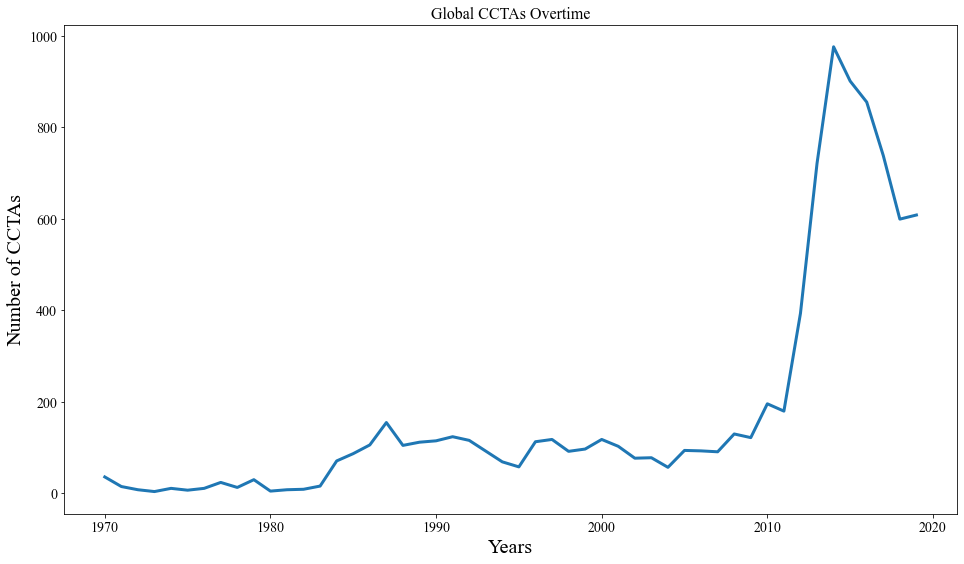

In [47]:
size = (16, 9)
fig, ax = plt.subplots(figsize=size)
# ax.axis('off')
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.title('Global CCTAs Overtime', size=16, loc='center')
plt.xticks(size=14)
plt.xlabel('Years', size=20)
plt.ylabel('Number of CCTAs', size=20)
plt.yticks(size=14)
plt.plot(global_CCTAs['iyear'], global_CCTAs['CCTAs'], linewidth=3)

In [37]:
gtd = gtd.drop(['CCTAs', 'CCTAs_next'], axis=1)

KeyError: "['CCTAs' 'CCTAs_next'] not found in axis"

In [19]:
gtd_original[ (gtd_original['city'] == 'San Bernardino') & (gtd_original['iyear'] == 2015) ]['individual']

156379    1
Name: individual, dtype: int64

#### GTD Cleaning

In [525]:
## GTD cleaning


## renaming for easier joining 
gtd.rename(columns = {'country_txt' : 'ID_country_name' ,'iyear':'ID_year'}, inplace= True)


## unknown property damage will be coded as missing, also we are reversing the scale, so that the higher number equates higher property damage
gtd.replace( {'propextent': {1.0: 3, 2.0: 2, 3.0: 1,4.0 : np.nan}}, inplace = True)


## if unidentified or unknown hostages, code as missing
gtd.replace( {'nhostkid' : {-99 : np.nan}}, inplace=  True)


gtd_variables_to_clean = ['attacktype1_txt', 'attacktype1', 
                        'weaptype1_txt', 'weaptype1', 'targtype1' , 
                        'targtype1_txt']
## loop through attack, weapon, and target types to remove any unknown elements 
for variables in gtd_variables_to_clean:
    gtd.replace( {variables : {'Unknown' : np.nan, 9 : np.nan, 13 : np.nan, 20 : np.nan}}, inplace=  True)

gtd = gtd.merge(ccta_amount, on = ['ID_country_name', 'ID_year'], how = 'inner')
gtd = gtd.merge(ccta_risk, on = ['ID_country_name', 'ID_year'], how = 'inner')
gtd.drop('related', axis=1, inplace=True)
#gtd = gtd[gtd['ID_year'] != 2019]

#gtd.head()

In [526]:
ccta_amount[ ccta_amount['ccta'] > 75]['ID_country_name'].unique()

array(['Afghanistan', 'Iraq', 'Nigeria', 'Pakistan', 'Syria', 'Yemen'],
      dtype=object)

In [527]:
ccta_amount[ ccta_amount['ccta'] > 150]['ID_country_name'].unique()

array(['Afghanistan', 'Iraq'], dtype=object)

In [528]:
#gtd[ (gtd['country_txt'] == 'Pakistan') & (gtd['multiple'] == 1)]['gname'].value_counts()

In [529]:
#gtd[ (gtd['country_txt'] == 'Iraq') & (gtd['multiple'] == 1)]['gname'].value_counts()

### Global States of Democracy preprocessing

In [530]:
## variables in gsod to study
gsod_variables = ['ID_country_name', 'ID_year', 'C_SD41', 'v_42_06', 'v_23_05', 'v_23_10', 'v_32_05', 'v_22_46', 'v_23_02', 'v_23_07', 'C_SD23C']

## we will rename all the columns in this
## the first two rename the same name because these are the names
## I will be using to join the datasets 
gsod_variable_names = [
                        'ID_country_name', 'ID_year', 'absence of corruption', 'bureaucratic quality', 'representation of disadvantaged social groups', 
                        'religious/ethnic tensions', 'law and order', 'internal conflict', 
                        'social group equality in respect for civil liberties', 'exclusion by political group', 'gender equality'
                      ]

In [531]:
## choose variables we are going to study from dataset
## all variables are on a 0 - 1 scale, no need to normalize
gsod = gsod_original[gsod_variables]

## rename the columns for ease of joining later 
## also renamed to understand what the variable represents 
gsod.columns = gsod_variable_names

#gsod.head()

### World Governance Indicators preprocessing - Retired Feature

In [532]:
#wgi = pd.read_csv("WGI.csv") commented out due to years restrictions 

## cleaning world governance indicators

## extracting wanted variable
# wgi[ (wgi['Indicator'] == 'Political Stability No Violence')]

# ## dropping unwanted columns
# wgi.drop(['Indicator', 'Subindicator Type'], axis=1, inplace = True)

# ## making years in the rows and the variable name as the column name
# wgi = wgi.melt(id_vars='Country Name', var_name = 'ID_year', value_name = 'Political Stability No Violence')

# wgi.rename(columns = {'Country Name' : 'ID_country_name'}, inplace= True)

# wgi['ID_year'] = wgi['ID_year'].astype(int)

# wgi.head()

### Military Expenditure preprocessing

In [533]:
## wide format, each column is a year
## placing the years as their own singular column without moving the data from it's position 
military = military_original.melt(id_vars='Country Name', var_name = 'ID_year', value_name = 'Military expenditure')

## renaming ID variables for ease of use later,
## year was renamed above in the melt function 
military.rename(columns = {'Country Name': 'ID_country_name'}, inplace= True)


## was coming out as a string, changed to be compatible in joining 
military['ID_year'] = military['ID_year'].astype(int)

#military.head()

### GDP Per Capita Growth Rate preprocessing

In [534]:
## melting the dataset, similar to the previous dataset 
gdp = gdp_original.melt(id_vars = 'Country Name', var_name = 'ID_year', value_name = 'GDP per Capita')

## renaming for joining purposes
gdp.rename(columns = {'Country Name' : 'ID_country_name'}, inplace= True)

## same problem with the joining as in military
gdp['ID_year'] = gdp['ID_year'].astype(int)

#gdp.head()

In [535]:
worldbank_df = military.merge(gdp, how = 'inner', on = ['ID_country_name', 'ID_year'])

In [536]:
#gdp.to_csv('GDPperCapita(% change).csv', header= True, index = False)

## Summary Tables

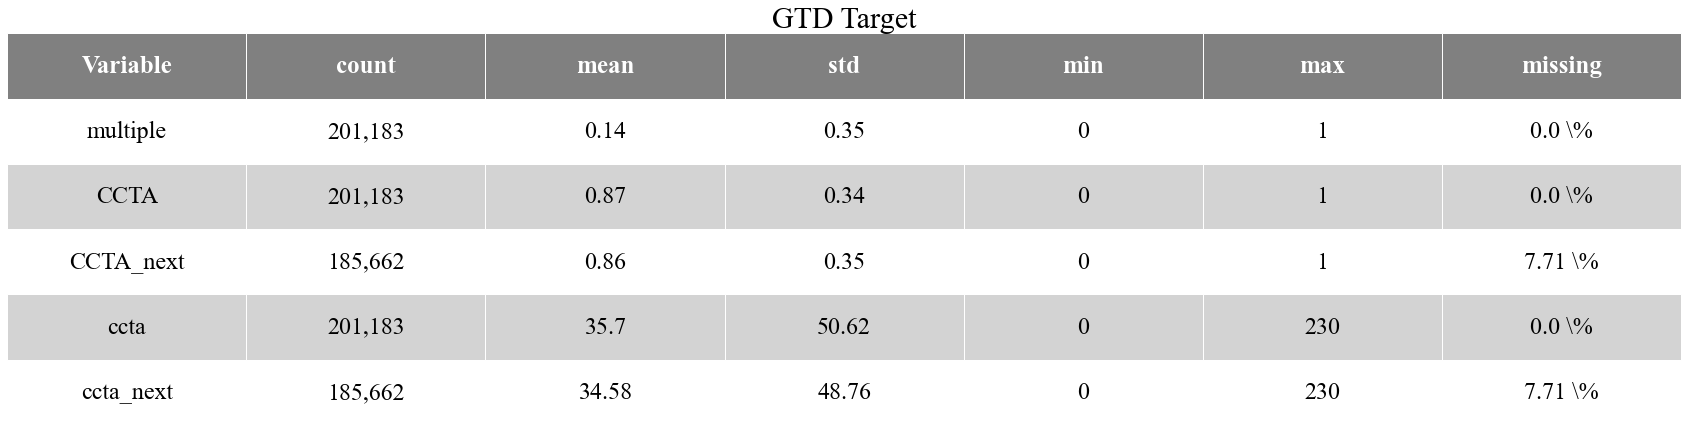

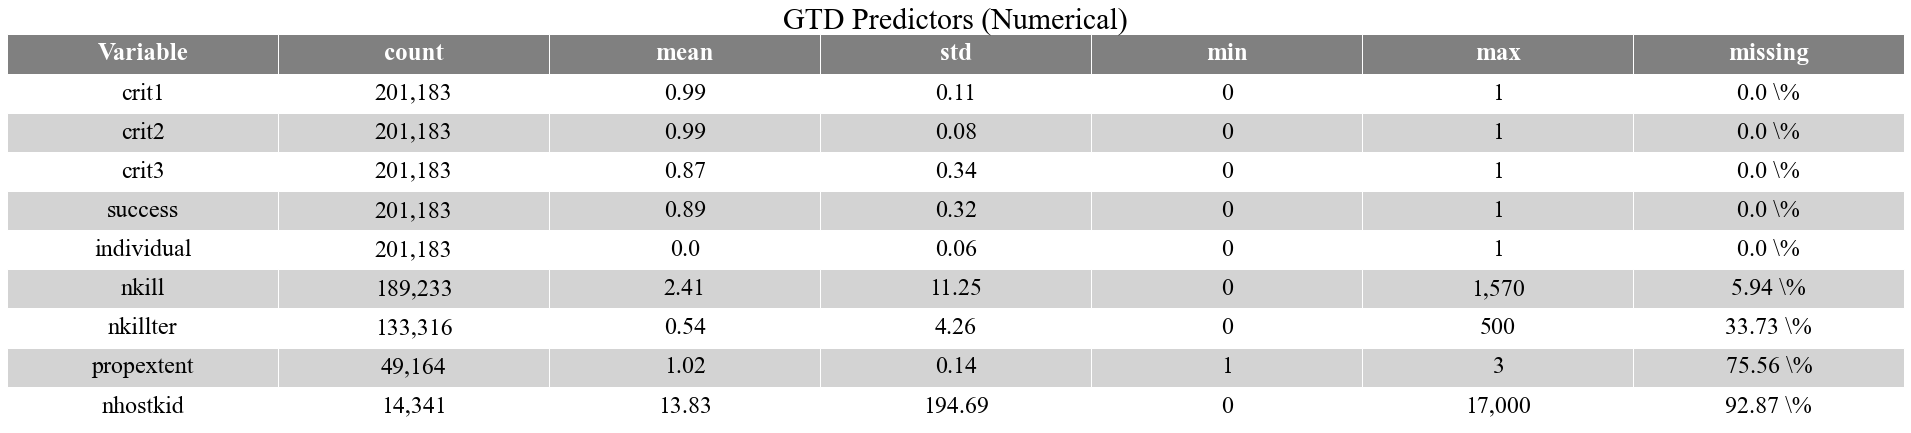

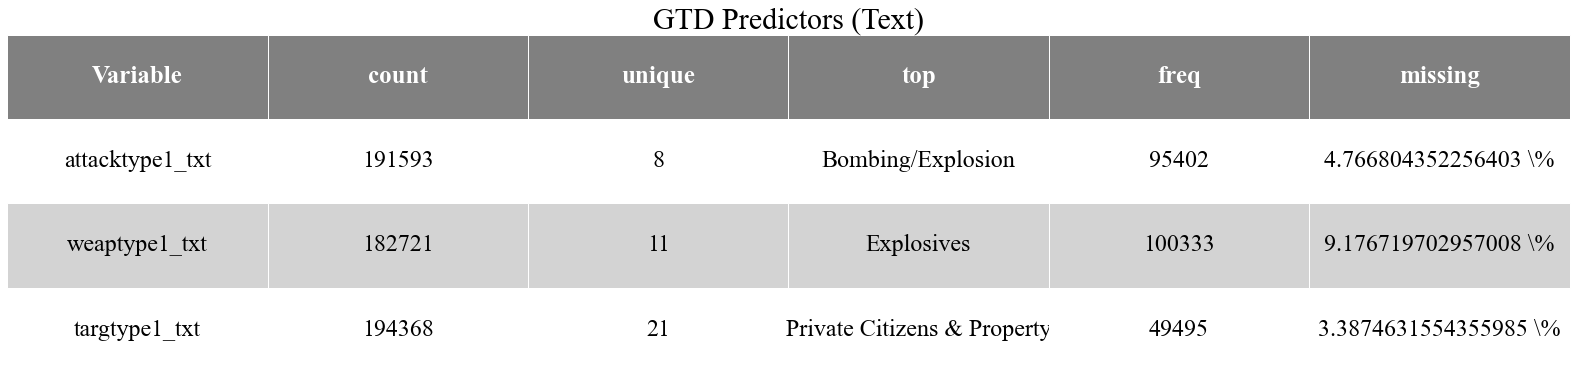

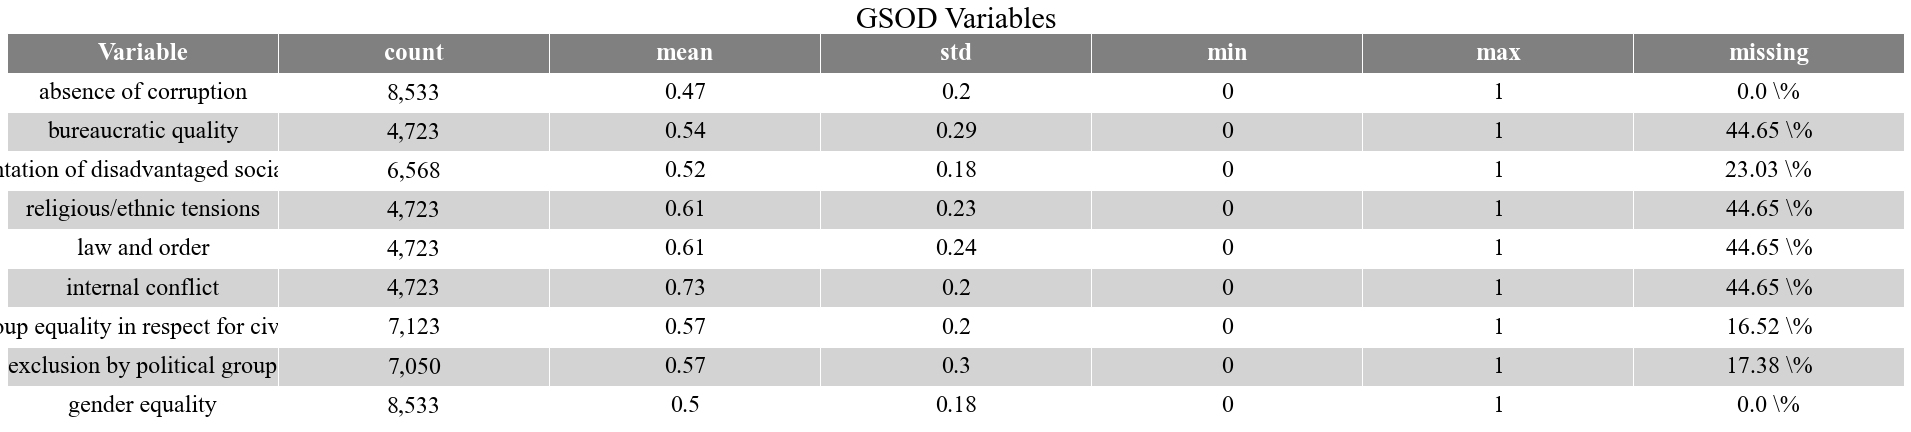

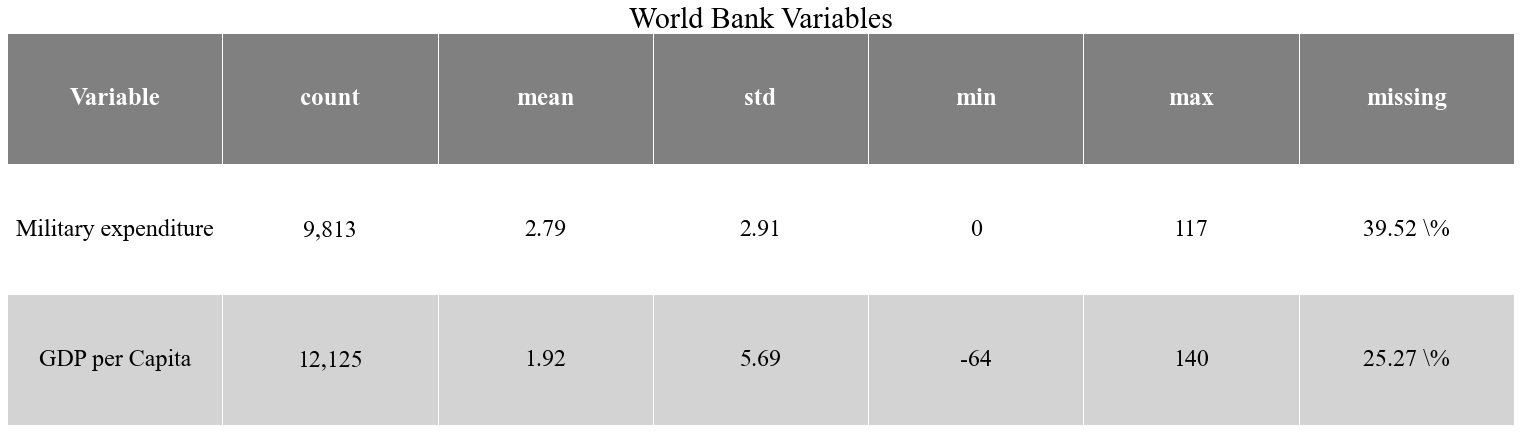

In [537]:
def summary_table(df, columns_to_exclude):
    df = df.drop(columns_to_exclude, axis=1)
    summary_stats = df.describe().drop(['25%', '50%', '75%'])

    summary_stats.loc[len(summary_stats)] = (df.isnull().sum() / len(df)) * 100

    summary_stats = summary_stats.T.rename(columns = {5 : 'missing'}).round(2)

    summary_stats['missing'] = summary_stats['missing'].apply(lambda x: str(x) + ' \%')

    #summary_stats.insert(0, 'Variable', summary_stats.index)
    
    #create_summary_table(summary_stats.round(2), summary_table_path + filename)

    return summary_stats

def plot_summary(df, title):
    size = (np.array(df.shape) + np.array([25, .2]))
    fig, ax = plt.subplots(figsize=size)
    ax.axis('off')
    plt.rcParams['font.sans-serif'] = 'Times New Roman'
    plt.title(title, size=30, loc='center')

    table = plt.table(cellText=df.values, bbox = [0,0,1,1], colLabels=df.columns)
    table.auto_set_font_size(False)

    
    for x in range(0, df.shape[0] + 1):
        for y in range(0, df.shape[1]):
        
        
            if x == 0 : ## header
                table[x,y].set_text_props(fontproperties=FontProperties(size=25, weight = 'bold'), color = 'white')
                table[x,y].set_facecolor('grey')
                table[x,y].set_edgecolor('w')
                table[x,y].set_fontsize
            elif x % 2 == 0 and x != 0: ## every other row will have a light grey 
                table[x,y].set_text_props(weight='normal', size = '24', color = 'black', ha = 'center', snap = True)
                table[x,y].set_facecolor('lightgrey')
                table[x,y].set_edgecolor('w')
            elif x % 2 == 1: ## odd rows will have white backgrou,nd
                table[x,y].set_text_props(weight='normal', size = '24', color = 'black', ha = 'center')
                table[x,y].set_edgecolor('w')





gtd_target =  gtd[ ['multiple', 'CCTA', 'CCTA_next', 'ccta', 'ccta_next'] ]

gtd_target_stats = summary_table(gtd_target, [])


gtd_predictors  = gtd.drop(
    ['ID_country_name', 'ID_year',  'gname', 'multiple', 'CCTA', 'CCTA_next', 'ccta', 'ccta_next'], 
    axis=1) 



gtd_predictors_stats = summary_table(gtd_predictors, 
                                ['attacktype1_txt', 'attacktype1',  'weaptype1_txt','weaptype1',
                                     'targtype1' , 'targtype1_txt'] 
                                )



gtd_predictor_summary_text = gtd_predictors.describe(include=[object])
gtd_predictor_summary_text.loc[len(gtd_predictor_summary_text)] = (gtd_predictors[['attacktype1_txt', 'weaptype1_txt', 'targtype1_txt']].isnull().sum() / len(gtd_predictors)) * 100
gtd_predictor_summary_text = gtd_predictor_summary_text.T.rename(columns = {4: 'missing'}).round(2)
gtd_predictor_summary_text['missing'] = gtd_predictor_summary_text['missing'].apply(lambda x: str(x) + ' \%')

gsod_stats = summary_table(gsod, ['ID_country_name', 'ID_year'])

wb_stats = summary_table(worldbank_df, ['ID_country_name', 'ID_year'])

for i in ['count', 'min', 'max']:
    gtd_target_stats[i] = gtd_target_stats[i].apply(lambda x : '{:,}'.format(x).split('.', 1)[0])
    gtd_predictors_stats[i] = gtd_predictors_stats[i].apply(lambda x : '{:,}'.format(x).split('.', 1)[0])
    gsod_stats[i] = gsod_stats[i].apply(lambda x:  '{:,}'.format(x).split('.', 1)[0])
    wb_stats[i] = wb_stats[i].apply(lambda x :  '{:,}'.format(x).split('.', 1)[0])

tables = [gtd_target_stats, gtd_predictors_stats, gtd_predictor_summary_text, gsod_stats, wb_stats]


titles = ['GTD Target', 'GTD Predictors (Numerical)' , 'GTD Predictors (Text)', 'GSOD Variables', 'World Bank Variables']
for x in np.arange(0,5,1):
    tables[x].insert(0, 'Variable', tables[x].index)
    plot_summary(tables[x], titles[x])

In [538]:
if apa_summary_table == True:
    def write_summary_table(df, source , label, text ):
        ## write the top of the table

        top_dict = {'SOURCE' : source, 'LABEL' : label}
        stats_dict = ()
        if text == False:
            with open(path + 'summary_table_top_template.tex', 'r') as myfile: 
                text = myfile.read()
                for key, value in top_dict.items():
                    text = text.replace('$' + key + '$', value) 
            
                with open(table_path + source + '_summary_stats.tex', 'w') as output:
                    output.write(text)
                    
                    ## write rows
            for index in df.index:
                arr = np.array(df.loc[index])
                arr = arr.astype(str)
                stats_dict = {'VARIABLE' : index, 'COUNT': df.loc[index]['count'], 'MEAN': df.loc[index]['mean'], 'STD' : df.loc[index]['std'], 'MIN' : df.loc[index]['min'], 'MAX' : df.loc[index]['max'], 'MISSING' : df.loc[index]['missing']}
                with open(path + 'summary_row_template.tex', 'r') as myfile:
                    text = myfile.read()
                    for key, value in stats_dict.items():
                        text = text.replace('$' + str(key) + '$', str(value))
                    with open(table_path + source + '_summary_stats.tex', 'a') as output:
                        output.write('\n' + text)

        if text == True:
            with open(path + 'summary_table_text_top_template.tex', 'r') as myfile: 
                text = myfile.read()
                for key, value in top_dict.items():
                    text = text.replace('$' + key + '$', value) 
            
                with open(table_path + source + '_summary_stats.tex', 'w') as output:
                    output.write(text)
            for index in df.index:
                arr = np.array(df.loc[index])
                arr = arr.astype(str)
                stats_dict ={'VARIABLE': index, 'COUNT' : arr[0], 'UNIQUE' : arr[1], 'TOP' : arr[2], 'FREQ' : arr[3], 'MISSING' : df.loc[index]['missing']}
                with open(path + 'summary_row_text_template.tex', 'r') as myfile:
                    text = myfile.read()
                    for key, value in stats_dict.items():
                        text = text.replace('$' + str(key )+ '$', str(value))
                    with open(table_path + source + '_summary_stats.tex', 'a') as output:
                        output.write('\n' + text)

                    
                    ## write rows            

        ## end the tabular environment
        with open(path + 'tabular_end.tex', 'r') as myfile:
            text = myfile.read()

            with open(table_path + source + '_summary_stats.tex', 'a') as output:
                output.write(text + '\n')


        with open(path + 'end_table_template.tex', 'r') as myfile:
            text = myfile.read()

            with open(table_path + source + '_summary_stats.tex', 'a') as output:
                output.write(text)

In [539]:
if apa_summary_table == True:
    sources = ['GTD Target', 'GTD Predictor (numerical)', 'GTD Predictor (text)', 'GSOD', 'World Bank']
    labels = ['GTD(target)', 'GTDPredNum', 'GTDPredText', 'GSOD', 'WorldBank']

    for i in np.arange(0,5,1):
        if i == 2:
            text_table = True
        else:
            text_table = False
        write_summary_table(tables[i], sources[i], labels[i], text_table)

In [540]:
gtd['CCTA_next'].value_counts()

1.0    159009
0.0     26653
Name: CCTA_next, dtype: int64

## Using fillna to compute missing values

In [541]:
if missing == 'fillna':   
     
    military['Military expenditure'].fillna( military['Military expenditure'].mean(), inplace= True)
    gdp['GDP per Capita'].fillna( gdp['GDP per Capita'].mean(), inplace = True)
    
    for variables in gsod.columns[2:]:
        gsod[variables].fillna( gsod[variables].mean(), inplace = True)

    for variables in gtd[['crit1', 'crit2', 'crit3', 'success','individual', 'nkill', 'nkillter', 'propextent', 'nhostkid', 'ccta',  'CCTA']]:
        gtd[variables].fillna( gtd[variables].mean(), inplace= True)

    for variables in gtd[['attacktype1', 'weaptype1', 'targtype1', 'CCTA_next', 'ccta_next']]:
        gtd[variables].fillna( gtd[variables].mode()[0], inplace= True)

## Scaling to [0,1]

In [542]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

In [543]:
def scale(df, column):
    df_norm = np.array(df[column]).reshape(-1 , 1)
    
    normalizer.fit(df_norm)
    
    df_norm = normalizer.transform(df_norm)

    df[column] = df_norm.reshape(1,-1)[0]

In [544]:
scale(military, 'Military expenditure')
scale(gdp, 'GDP per Capita')

for variables in ['attacktype1', 'weaptype1',  'targtype1',  'nkill', 'nkillter', 'propextent', 'nhostkid', 'ccta', 'CCTA']:
    scale(gtd, variables)

## Merging the sets 

In [545]:
#  data for classification
merged_df = gtd.drop(['attacktype1_txt', 'weaptype1_txt', 'targtype1_txt'], axis=1).merge(
    gsod, how='inner', on = merge_col).merge(
        military, how='inner', on=merge_col).merge(
            gdp, how='inner', on = merge_col)

In [546]:
## we don't want the year 2019 because we don't have any target information 


## dropping 2019 from the  dataset
drop_2019 = merged_df[ merged_df['ID_year'] != 2019]
model_df = drop_2019.drop(merge_col, axis=1)

In [547]:
model_df.columns.shape

(29,)

## Target Selection

In [548]:
if target_variable == 'CCTA_next':
    model_df2 = model_df.drop(['ccta', 'ccta_next'], axis=1)

if target_variable == 'ccta_next':
    model_df2 = model_df.drop(['CCTA', 'CCTA_next'], axis=1)

# Finding Correlated Features

In [549]:
if (run_correlation == True):

                                ##targetvariable        ## correlation limit, absolute value
    def feature_correlation(df, target, correlation_limit):
        correlated_features = list()
        correlation_matrix = df.corr()
        #correlation_matrix = df.drop(target, axis=1).corr()

        for i in range(len(correlation_matrix.columns)): 
            for j in range(i):                          
                if correlation_matrix.iloc[i, j] > correlation_limit:
                    colname = correlation_matrix.columns[i]
                    rowname = correlation_matrix.index[j]
                    correlated_features.append(colname + ' '+ str(correlation_matrix.iloc[i,j]) + ' ' + rowname)
                elif correlation_matrix.iloc[i,j] < np.negative(correlation_limit): 
                    colname = correlation_matrix.columns[i]
                    rowname = correlation_matrix.index[j]
                    correlated_features.append(colname + ' '+ str(correlation_matrix.iloc[i,j]))
        return correlated_features


    correlated_features = feature_correlation(model_df.drop([target_variable, target_variable.replace('_next', '')], axis=1), target_variable, corr_limit)

    

In [550]:
correlated_features

['bureaucratic quality 0.7329349039773513 absence of corruption',
 'internal conflict 0.6686202619332912 law and order',
 'exclusion by political group 0.6697665212836975 absence of corruption',
 'gender equality 0.6711755020991954 absence of corruption',
 'gender equality 0.7159850204831768 exclusion by political group']

In [551]:

## both targets have the same features correlated
## ccta_next is correlated with ccta ( not the case for risk )
## it gets removed later in the splitting phase anyways

model_df2 = model_df2.drop(['law and order', 'absence of corruption', 'exclusion by political group'], axis = 1)

In [552]:
## dropping group name! interested, but haven't gotten to it yet!
model_df2.drop('gname', axis=1, inplace=True) ## dropping this for knn

## KNN missing data impute

In [553]:
## roughly 40-45 minutes to run 

## the dataframe was saved as a .csv file to be reloaded next time

if (missing == 'knn' and run_knn == True):
    from sklearn.impute import KNNImputer

    imputer = KNNImputer(n_neighbors=3)

    model_df_imputed = pd.DataFrame(imputer.fit_transform(model_df2), columns =model_df2.columns)

    model_df_imputed.to_csv('Model_DF_KNN_Imputed.csv', header= True, index = False)

In [554]:
if use_knn == True:
    model_df_imputed = pd.read_csv('Model_DF_KNN_Imputed.csv')

    ## getting continuous values from knn imputed data
    ## this is keeping model from running

    ## .33333 and .666667 rounded down and up respectively
    model_df_imputed['CCTA_next'] = model_df_imputed['CCTA_next'].apply(lambda x: 0 if x < .5 else  1)
    
    ## round up or down to whole number
    model_df_imputed['ccta_next'] = model_df_imputed['ccta_next'].round()


    model_df2 = model_df_imputed

# Models 

In [555]:
from sklearn.model_selection import train_test_split

## models
### decision trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### naive bayes
from sklearn.naive_bayes import ComplementNB, MultinomialNB, CategoricalNB

### Stochasic Gradient Descent
from sklearn.linear_model import SGDClassifier

## Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier

## scoring measures
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, matthews_corrcoef, recall_score, precision_score, f1_score, cohen_kappa_score

## cross validation and kfold 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [556]:
## baselines

def baselineAccuracy(df, target):
	if target == 'ccta_next':
		return df[target].mean()
	else: 
		return df[target][df[target] == 1].count() /len(df[target]) * 100

In [557]:
baselineAccuracy(model_df2, target_variable)

35.151789881452444

In [558]:
print('test ', test)
print('state ', state)

test  0.3
state  2


In [559]:
## split the data into training and testing 
df_train, df_test = train_test_split(model_df2, test_size = test, random_state = state, shuffle= True)


## drop the ccta/CCTA for current year. not correlated with target, however both were always showing up in early RFE exploration
## removed just in case!
x_train_cat = df_train.drop([target_variable, target_variable.replace('_next', '')]  , axis=1)
y_train_cat = df_train[target_variable]

x_test_cat = df_test.drop([target_variable, target_variable.replace('_next', '')]  , axis=1)
y_test_cat = df_test[target_variable]


## Decision Tree (C5.0)

In [590]:

C50 = DecisionTreeClassifier(criterion = "entropy",max_leaf_nodes=100).fit(x_train_cat,y_train_cat)
## run the prediciton on training data
C50_pred_train = C50.predict(x_train_cat)
## score of how accurate model is

C50_train_score = '{0:.4f}'.format(C50.score(x_train_cat,y_train_cat) * 100)

C50_pred = C50.predict(x_test_cat)

C50_test_score = '{0:.4f}'.format(C50.score(x_test_cat,y_test_cat) * 100)

In [591]:
print(C50_train_score)
print(C50_test_score)

62.1411
62.0092


## Random Forest Classifier

In [592]:
RFC = RandomForestClassifier(n_estimators = 100, criterion = "entropy", n_jobs = -1).fit(x_train_cat, y_train_cat)
prediction_RFC_train = RFC.predict(x_train_cat)
RFC_train_score = '{0:.4f}'.format(RFC.score(x_train_cat, y_train_cat) * 100)
RFC_pred = RFC.predict(x_test_cat)

In [593]:
RFC_accuracy = accuracy_score(RFC_pred ,y_test_cat)

In [594]:
print('RFC Training Accuracy: ', RFC_train_score)
print('Accuracy Score: ', RFC_accuracy * 100)

RFC Training Accuracy:  98.9982
Accuracy Score:  98.63290745386306


In [595]:
x_train_cat.isnull().sum()

representation of disadvantaged social groups           0
internal conflict                                       0
social group equality in respect for civil liberties    0
gender equality                                         0
Military expenditure                                    0
GDP per Capita                                          0
dtype: int64

## SVC - using SGD due to amount of samples

In [596]:
SGD = SGDClassifier(loss = 'log', random_state=state,n_jobs=-1).fit(x_train_cat, y_train_cat)

In [597]:
SGD_train_pred = SGD.predict(x_train_cat)
SGD_train_score = '{0:.4f}'.format(SGD.score(x_train_cat, y_train_cat) * 100)
SGD_pred = SGD.predict(x_test_cat)

In [598]:
SGD_accuracy = accuracy_score(SGD_pred ,y_test_cat)
print('SGD Training Accuracy: ', SGD_train_score)
print('Accuracy Score: ', SGD_accuracy * 100)
#print('AUC: ', roc_auc_score(SGD_pred, y_test_cat, multi_class = 'ovr'))

SGD Training Accuracy:  19.8858
Accuracy Score:  19.891877175582913


## Naive Bayes

In [599]:
MNB = MultinomialNB().fit(x_train_cat, y_train_cat)
CoNB = ComplementNB().fit(x_train_cat, y_train_cat)
CaNB = CategoricalNB().fit(x_train_cat, y_train_cat)



In [600]:
Canb = CaNB.predict(x_train_cat)

CaNB_train_score = '{0:.4f}'.format(CaNB.score(x_train_cat, y_train_cat) * 100)

CaNB_pred = CaNB.predict(x_test_cat)

In [601]:
print(CaNB_train_score)
print(CaNB.score(x_test_cat, y_test_cat) * 100)

13.8159
13.83816580129514


In [602]:
Conb = CoNB.predict(x_train_cat)

CoNB_train_score = '{0:.4f}'.format(CoNB.score(x_train_cat, y_train_cat) * 100)

CoNB_pred = CoNB.predict(x_test_cat)

In [603]:
print(CoNB_train_score)
print(CoNB.score(x_test_cat, y_test_cat) * 100)

16.3479
16.19119849094763


In [604]:
MNB_train_pred = MNB.predict(x_train_cat)

MNB_train_score = '{0:.4f}'.format(MNB.score(x_train_cat, y_train_cat) * 100)

MNB_pred = MNB.predict(x_test_cat)

In [605]:
print(MNB_train_score)
print(MNB.score(x_test_cat, y_test_cat) * 100)

13.8109
13.845944421756801


## Neural Network

In [606]:
MLP = MLPClassifier(hidden_layer_sizes=(600,), batch_size = 200, activation='relu', solver='adam', max_iter=100)

MLP.fit(x_train_cat,y_train_cat)


MLP_train_pred = MLP.predict(x_train_cat)

MLP_pred = MLP.predict(x_test_cat)

C:\Users\ricke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [607]:
print(accuracy_score(MLP_train_pred, y_train_cat))

0.8011251406425803


In [608]:
print(MLP.score(x_test_cat, y_test_cat))
#print(roc_auc_score(MLP_pred, y_test_cat, multi_class='ovr'))

0.7970946852575695


In [609]:
print(f1_score(MLP_pred, y_test_cat, average='macro'))

0.854888187263219


## Scoring

In [610]:
## binary target 

## auc 
## confusion matrix
## accuracy
## recall, precision, f1 score

## number of attacks

## Coehn Kappa Score (Accuracy but accounts for predicting true positive by chance)
## Mathew's Correlation Coeeficient
## auc
## f1

In [611]:
def scoring(rnd, 
predictions = [C50_pred, RFC_pred, SGD_pred, MNB_pred, MLP_pred], 
models = ['CART5.0', 'Random Forest', 'Stochastic Gradient Descent', 'Multinomial Naive Bayes', 'Multi-layer Perceptron'], 
y = y_test_cat):


    ## take in all predictions from the models and get various scores
    if target_variable == 'CCTA_next':

        scores = pd.DataFrame( columns = ['Model', 'Accuracy', 'ROC_AUC', 'F1 Score', 'Precision', 'Recall'])
        newrow = dict()
        for x in np.arange(0,5,1):
            newrow = {'Model' : models[x], 
                    'Accuracy' : accuracy_score(y, predictions[x]), 
                    'ROC_AUC' : roc_auc_score(y, predictions[x]), 
                    'F1 Score' : f1_score(y, predictions[x]), 
                    'Precision': precision_score(y, predictions[x]), 
                    'Recall' : recall_score(y, predictions[x])
                    }  
            scores = scores.append(newrow, ignore_index = True)

    elif target_variable == 'ccta_next': 
        scores = pd.DataFrame( columns = ['Model', 'Cohen Kappa', 'ROC_AUC','F1Score', 'Precision', 'Recall'])
        newrow = dict()
        for x in np.arange(0,5,1):
            newrow = {'Model' : models[x], 
                    'Cohen Kappa' : cohen_kappa_score(y, predictions[x]), 
                    'ROC_AUC' : '---', 
                    'Matcoef' : '---',
                    'F1Score' : f1_score(y, predictions[x], average='macro'), 
                    'Precision': precision_score(y, predictions[x], average='macro'), 
                    'Recall' : recall_score(y, predictions[x], average='macro')
                    }  
            scores = scores.append(newrow, ignore_index = True)    

    if rnd == True:
        return scores.round(2)
    else:
        return scores

In [612]:
scores_df = scoring(False)

C:\Users\ricke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ricke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ricke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precis

In [613]:
scores_df

,Model,Cohen Kappa,ROC_AUC,F1Score,Precision,Recall,Matcoef
0,CART5.0,0.602579,---,0.577937,0.564572,0.642105,---
1,Random Forest,0.985739,---,0.951920,0.953089,0.950861,---
2,Stochastic Gradient Descent,0.106748,---,0.028233,0.024908,0.053393,---
3,Multinomial Naive Bayes,0.000000,---,0.003475,0.001978,0.014286,---
4,Multi-layer Perceptron,0.787408,---,0.854888,0.863086,0.853835,---


In [614]:
def model_apa_table(df, filename, target, label):
    if target == 'CCTA_next':
        with open(path + 'model_table_top.tex', 'r') as myfile:
            text = myfile.read()

            text = text.replace('$' + 'LABEL' + '$', label)

        with open(table_path + filename, 'w') as output:
            output.write(text)## write top of table

        with open(path + 'target_header_template.tex', 'r') as myfile:
            text = myfile.read()

            text = text.replace('$' + 'TARGET' + '$', target)

            with open(table_path + filename, 'a') as output:
                output.write(text)

        score_dict = dict()
        for index in df.index:
            arr = np.array(df.loc[index])
            arr = arr.astype(str)
            score_dict = {'MODEL' : arr[0], 'ACCURACY': arr[1], 'ROCAUC' : arr[2],
                    'F1SCORE' : arr[3], 'PRECISION' : arr[4], 'RECALL' : arr[5]}
            with open(path + 'score_row_template.tex', 'r') as myfile:
                text = myfile.read()
                for key, value in score_dict.items():
                    text = text.replace('$' + key + '$', value)
                with open(table_path + filename, 'a') as output:
                    output.write('\n' + text)

    if target == 'ccta_next':
        with open( path + 'model_top_ccta.tex', 'r') as myfile:
            text = myfile.read()

            text = text.replace('$LABEL$', label)

            with open(table_path + filename, 'w') as output:
                output.write(text)

        with open(path + 'target_header_template.tex', 'r') as myfile:
            text = myfile.read()

            text = text.replace('$TARGET$', target)

            with open(table_path + filename, 'a') as output:
                output.write(text)

        score_dict = dict()
        for index in df.index:
            arr = np.array(df.loc[index])
            arr = arr.astype(str)
            score_dict = {'MODEL' : arr[0], 'COHENKAPPA': arr[1], 'ROCAUC' : arr[2], 'MATCOEF'
                'F1SCORE' : arr[4], 'PRECISION' : arr[5], 'RECALL' : arr[6]}
            with open(path + 'score_row_ccta.tex', 'r') as myfile:
                text = myfile.read()
                for key, value in score_dict.items():
                    text = text.replace('$' + key + '$', value)
                with open(table_path + filename, 'a') as output:
                    output.write('\n' + text)

    ## end the tabular environment
    with open(path + 'tabular_end.tex', 'r') as myfile:
        text = myfile.read()

        with open(table_path + filename, 'a') as output:
            output.write('\n' + text)


    with open(path + 'end_table_template.tex', 'r') as myfile:
        text = myfile.read()

        with open(table_path + filename, 'a') as output:
            output.write(text)
    

In [620]:
model_apa_table(scores_df, 'knn_RFE_amount.tex', target_variable, 'amount1')

# Analysis

In [619]:
#knn_rfe_amount = scores_df
#knn_rfe_amount.to_csv('knn_rfe_amount.csv', header=True, index=False)

knn_rfe_amount = pd.read_csv('knn_rfe_amount.csv')
knn_rfe_amount

,Model,Cohen Kappa,ROC_AUC,F1Score,Precision,Recall,Matcoef
0,CART5.0,0.602579,---,0.577937,0.564572,0.642105,---
1,Random Forest,0.985739,---,0.951920,0.953089,0.950861,---
2,Stochastic Gradient Descent,0.106748,---,0.028233,0.024908,0.053393,---
3,Multinomial Naive Bayes,0.000000,---,0.003475,0.001978,0.014286,---
4,Multi-layer Perceptron,0.787408,---,0.854888,0.863086,0.853835,---


In [588]:
#knn_initial_amount = scores_df
#knn_initial_amount.to_csv('knn_initial_amount.csv', header=True, index=False)

knn_initial_amount = pd.read_csv('knn_initial_amount.csv')
knn_initial_amount

,Model,Cohen Kappa,ROC_AUC,F1Score,Precision,Recall,Matcoef
0,CART5.0,0.697915,---,0.595132,0.574316,0.642396,---
1,Random Forest,0.994788,---,0.997385,0.997572,0.997209,---
2,Stochastic Gradient Descent,0.277264,---,0.094218,0.132588,0.116236,---
3,Multinomial Naive Bayes,0.141367,---,0.017327,0.038116,0.028656,---
4,Multi-layer Perceptron,0.892611,---,0.891847,0.900844,0.887955,---


In [454]:
#simple_initial_amount = scores_df
#simple_initial_amount.to_csv('scores_simple_amount.csv', header=True, index=False)

simple_initial_amount = pd.read_csv('scores_simple_amount.csv')
simple_initial_amount

,Model,Cohen Kappa,ROC_AUC,F1 Score,Precision,Recall,Mathew's COEF
0,CART5.0,0.619359,---,0.611241,0.591517,0.671669,0.625580
1,Random Forest,0.997412,---,0.998591,0.998502,0.998691,0.997413
2,Stochastic Gradient Descent,0.118493,---,0.045834,0.071100,0.066502,0.147829
3,Multinomial Naive Bayes,0.000000,---,0.004134,0.002399,0.014925,0.000000
4,Multi-layer Perceptron,0.828761,---,0.902534,0.929152,0.901329,0.831218


In [77]:
# simple_RFE_CCTA = scores_df
# simple_RFE_CCTA.to_csv('scores_simple_RFE_CCTA.csv', header=True, index=False)

simple_RFE_CCTA_scores = pd.read_csv('scores_simple_RFE_CCTA.csv')
simple_RFE_CCTA_scores

,Model,Accuracy,ROC_AUC,F1 Score,Precision,Recall
0,CART5.0,0.952648,0.871462,0.973101,0.966302,0.979997
1,Random Forest,0.995722,0.991410,0.997552,0.997929,0.997174
2,Stochastic Gradient Descent,0.873306,0.518621,0.931962,0.878156,0.992791
3,Multinomial Naive Bayes,0.874006,0.500000,0.932767,0.874006,1.000000
4,Multi-layer Perceptron,0.933998,0.838469,0.962390,0.958630,0.966180


In [78]:
# simple_initial_CCTA = scores_df
# simple_initial_CCTA.to_csv('scores_simple_CCTA.csv', header=True, index=False)

simple_initial_CCTA_scores = pd.read_csv('scores_simple_CCTA.csv')
simple_initial_CCTA_scores

,Model,Accuracy,ROC_AUC,F1 Score,Precision,Recall
0,CART5.0,0.955487,0.884446,0.974659,0.969945,0.979419
1,Random Forest,0.996772,0.993926,0.998152,0.998575,0.997731
2,Stochastic Gradient Descent,0.873325,0.518632,0.931973,0.878159,0.992813
3,Multinomial Naive Bayes,0.874006,0.500000,0.932767,0.874006,1.000000
4,Multi-layer Perceptron,0.931179,0.807531,0.961103,0.949654,0.972833


In [165]:
# after_RFECV_CCTA = scores_df
# after_RFECV_CCTA.to_csv('scores_KNN_RFECV_CCTA.csv', header=True, index=False)

knn_RFE_CCTA_scores = pd.read_csv('scores_KNN_RFECV_CCTA.csv')
knn_RFE_CCTA_scores

,Model,Accuracy,ROC_AUC,F1 Score,Precision,Recall
0,CART5.0,0.945063,0.862436,0.968315,0.959181,0.977624
1,Random Forest,0.995080,0.991273,0.997134,0.997687,0.996580
2,Stochastic Gradient Descent,0.857223,0.515599,0.922660,0.862497,0.991847
3,Multinomial Naive Bayes,0.858662,0.500000,0.923957,0.858662,1.000000
4,Multi-layer Perceptron,0.946755,0.882157,0.969095,0.965998,0.972212


In [164]:
model_apa_table(knn_RFE_CCTA_scores, 'knn_RFE_ccta_table.tex', 'KNN Imputation', 'CCTAscores')

In [80]:
# initial_model_CCTA = scores_df
# initial_model_CCTA.to_csv('initial_model_CCTA.csv', header=True, index=False)

knn_initial_scores = pd.read_csv('initial_model_CCTA.csv')
knn_initial_scores

## very high random forest, with perfect recall and precision
##  and near perfect auc score
## double check this with cross validation belo
# w


## SGD has great recall and f1, but is basically guessing from auc score 
## NB not that great either, but with perfect recall. 
#### so both of these are getting all the true positives, but also FPs

## Neural Network is looking similar compared to pre-RFE

,Model,Accuracy,ROC_AUC,F1 Score,Precision,Recall
0,CART5.0,0.945025,0.862356,0.968293,0.959159,0.977602
1,Random Forest,0.994419,0.989509,0.996749,0.997144,0.996354
2,Stochastic Gradient Descent,0.858721,0.500206,0.923986,0.858713,1.000000
3,Multinomial Naive Bayes,0.858662,0.500000,0.923957,0.858662,1.000000
4,Multi-layer Perceptron,0.944636,0.879486,0.967843,0.965390,0.970309


In [ ]:
#model_apa_table(initial_scores, 'KNN_initial_model.tex', target_variable, '1stmodel')

In [ ]:
## double checking decision tree and random forest
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = model_df2.drop([target_variable, target_variable.replace('_next', '')], axis=1)
y = model_df2[target_variable]

k = 10
crossvalidation = KFold(n_splits=k, random_state=2, shuffle=True)

RFC_CV_scores = cross_val_score(RFC, X, y, cv=crossvalidation)

C50_CV_scores = cross_val_score(C50, X, y, cv=crossvalidation)

In [ ]:
print("RF cross validation scores with k=10: ", RFC_CV_scores)
print("Average score of all folds:", round(RFC_CV_scores.mean(), 5))
print('RFC Train Score: ', RFC_train_score)

In [ ]:
# RF cross validation scores with k=10:  [0.99533283 0.99509947 0.9966163  0.99568287 0.99504113 0.99568287
#  0.99544951 0.99492445 0.99399067 0.99509918]
# Average score of all folds: 0.99529
# RFC Train Score:  99.9992

# knn initial CV 

In [ ]:
# RF cross validation scores with k=10:  [0.99702468 0.99760807 0.99714136 0.99702468 0.9971997  0.99696634
#  0.99743306 0.99784143 0.99725788 0.99714119]
# Average score of all folds: 0.99726
# RFC Train Score:  100.0000

## simple intitial cv

In [ ]:
print("C50 cross validation scores with k=10: ", C50_CV_scores)
print("Average score of all folds:", round(C50_CV_scores.mean(), 5))
## slightly overfitted
print('C50 Train Score: ', C50_train_score)

# Recursive Feature Elimination with Cross Validation

In [455]:
from sklearn.feature_selection import RFECV
def RFE_CV (X, y, estimator, min_features, steps, scoring):
    rfecv = RFECV(
        estimator = estimator,
        min_features_to_select= min_features,
        step = steps,
        scoring = scoring,
        cv = 10,
        n_jobs=-1,
    )

    _ = rfecv.fit(X,y)
    
    print(X.columns[rfecv.support_])
    print(X.columns[rfecv.support_].shape)
    print('Optimal number of features: {}'.format(rfecv.n_features_))


    plt.figure(figsize=(16, 9))
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
    plt.title('Recursive Feature Elimination with 10-Fold Cross-Validation', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
    plt.xticks(np.arange(1, (len(X.columns) + 1)))
    plt.ylabel(scoring, fontsize=14, labelpad=20)
    #plt.savefig('LR_RFECV.png')
    plt.show()

Index(['representation of disadvantaged social groups', 'internal conflict',
       'social group equality in respect for civil liberties',
       'gender equality', 'Military expenditure', 'GDP per Capita'],
      dtype='object')
(6,)
Optimal number of features: 6


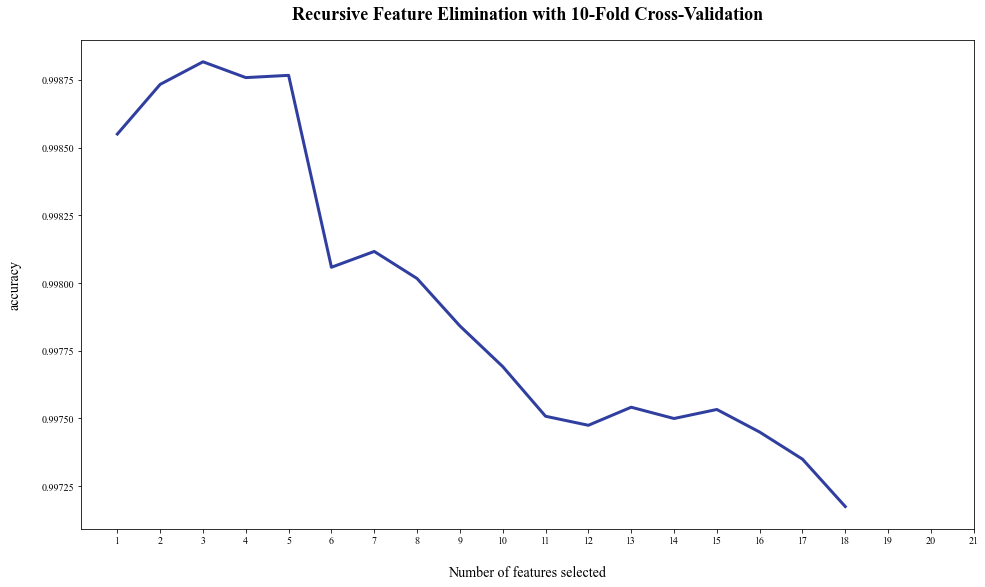

In [456]:
RFE_CV(x_train_cat, y_train_cat, RandomForestClassifier(n_jobs=-1), 4, 1, 'accuracy')

In [ ]:
x_train_cat = x_train_cat[['attacktype1', 'targtype1', 'nkillter', 'nhostkid',
       'bureaucratic quality', 'representation of disadvantaged social groups',
       'religious/ethnic tensions', 'internal conflict',
       'social group equality in respect for civil liberties',
       'gender equality', 'Military expenditure', 'GDP per Capita']]

x_test_cat = x_test_cat[['attacktype1', 'targtype1', 'nkillter', 'nhostkid',
       'bureaucratic quality', 'representation of disadvantaged social groups',
       'religious/ethnic tensions', 'internal conflict',
       'social group equality in respect for civil liberties',
       'gender equality', 'Military expenditure', 'GDP per Capita']]


In [ ]:
model_df2['nhostkid'].value_counts()

In [383]:
x_train_cat = x_train_cat[['internal conflict',
       'social group equality in respect for civil liberties',
       'gender equality', 'Military expenditure', 'GDP per Capita']]

x_test_cat = x_test_cat[['internal conflict',
       'social group equality in respect for civil liberties',
       'gender equality', 'Military expenditure', 'GDP per Capita']]

## simple missing strategy
## CCTA as target
## RFE_CV(x_train_cat, y_train_cat, RandomForestClassifier(n_jobs=-1), 4, 1, 'accuracy')

In [589]:
x_train_cat = x_train_cat[['representation of disadvantaged social groups', 'internal conflict',
       'social group equality in respect for civil liberties',
       'gender equality', 'Military expenditure', 'GDP per Capita']]

x_test_cat = x_test_cat[['representation of disadvantaged social groups', 'internal conflict',
       'social group equality in respect for civil liberties',
       'gender equality', 'Military expenditure', 'GDP per Capita']]

In [ ]:
## dropping the values RFECV found, and seeing what happens to the model! 

## needs the train_test_split done before it can be run

runthis = False

if runthis == True:
    model_df2 = model_df2.drop(['ccta', 'absence of corruption', 'representation of disadvantaged social groups', 'law and order',
       'social group equality in respect for civil liberties', 'Military expenditure', 'GDP per Capita'], axis = 1)
    # RFC = RandomForestClassifier(n_estimators = 50, criterion = "entropy").fit(x_train_cat, y_train_cat)
    # prediction_RFC = RFC.predict(x_train_cat)
    # RFC_train_score = '{0:.4f}'.format(RFC.score(x_train_cat, y_train_cat) * 100)
    # prediction_RFC_test = RFC.predict(x_test_cat)
    # RFC_test_score = '{0:.4f}'.format(RFC.score(x_test_cat, y_test_cat) * 100)
    # print('RFC Training Accuracy: ', RFC_train_score)
    # print('RFC Testing Accuracy: ', RFC_test_score)


    # RFC Training Accuracy:  30.5996
    # RFC Testing Accuracy:  19.1117

The training and testing scores are much worse without the 7 features selected with RFECV.